The first function considered is a smooth harmonic function, given by *f* :  $[0,1)$ x $[0,1)-> [1,3]$ .

$f(x, y) = sin(2πx) cos(4π y) + 2$. We also analyze convergence behaviour of this metamodel techniques.

In [1]:
from utility import *
import numpy as np
import matplotlib.pyplot as plt

**Define Function**

*f* :  $[0,1)$ x $[0,1)-> [1,3]$

$f(x, y) = sin(2πx) cos(4π y) + 2$

In [2]:
# Analytical function to be predicted
def F(X):
    return np.sin(2*np.pi*X[:,0])*np.cos(4*np.pi*X[:,1])+2

**Create Data**

Create randomly distrubuted input points in 2D plane.

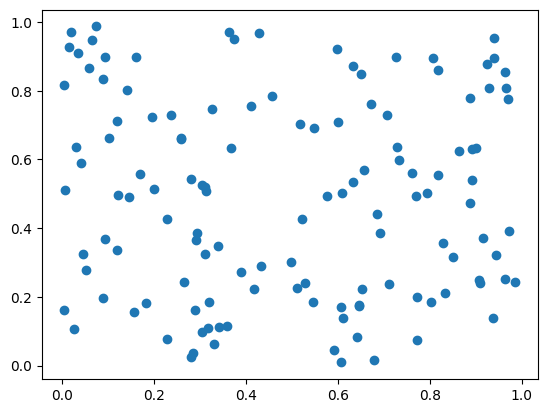

In [3]:
X,y = GenerateData((128,2),F)
plt.scatter(X[:,0],X[:,1])
plt.show()

**Visualize**

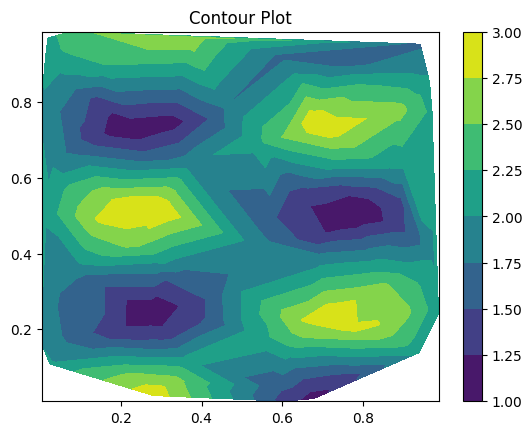

In [4]:
VisualizeData2D(X,y,"Contour Plot")

**Loss function**

It's a regression task ! Hence we are using root mean squared error loss function.

**Create Test data**

Create test points within the domain of function.

In [5]:
X_test,y_test = GenerateData((1000,2),F)

In [6]:
betas = [9,10,11,12,13,14,15,17,19,21]
nCentres = [75,80,85]
min_loss,optimal_beta,optimal_nCentres = GridSearch(betas,nCentres,X,y,X_test,y_test)
print(f"minimum loss: {min_loss:.6f}")
print(f"optimal beta: {optimal_beta}")
print(f"optimal number of Centres: {optimal_nCentres}")

minimum loss: 0.019230
optimal beta: 17
optimal number of Centres: 80


**Let make model using optimal set of hyperparameter obtained from grid search.**

In [7]:
model = RBFNN(nCentres=optimal_nCentres)
model.reset_parameter(X,y,beta=optimal_beta)
pred = model.forward(X)
print(f"RBF Centres shape:\n {model.RBF.centres.shape}")
print(f"Weight parameter: \n {model.Linear.weights}")

RBF Centres shape:
 (80, 2)
Weight parameter: 
 [  153.66402574   830.96659191  1878.8085923   -325.1220161
   -78.21070714  -100.11635515    68.57694256  -288.88789827
  -700.00330282   541.40893846    82.03295914    91.57359271
 -3028.91058901  -476.13413133   287.47629694   -82.88452303
  -229.16510255   470.74905725  1109.00358278   238.09624014
    20.26747049   688.34460914    28.20296252  1420.36829005
  -299.9891104     58.07181276  -411.98173882   234.24335798
   138.02854338 -1143.96475311 -4193.93470028    28.82134195
 -2144.53605748  -906.66902539    78.83409462   464.03474537
     4.79921249    92.69759642   113.02178255  -371.32367724
 -1340.75930581  -117.67698035   269.11712362   -16.00101916
   -72.48721989   135.96324334  -696.0965751   -836.50969934
   921.10816013 -1160.54228348 -1007.12326771   557.07894524
   273.46421009  -152.51435476  4325.08854905   317.17566497
   -15.1599133    250.81417488   162.53910465   750.60578647
    10.69342527   988.55004751    54.6

**Plot the result**

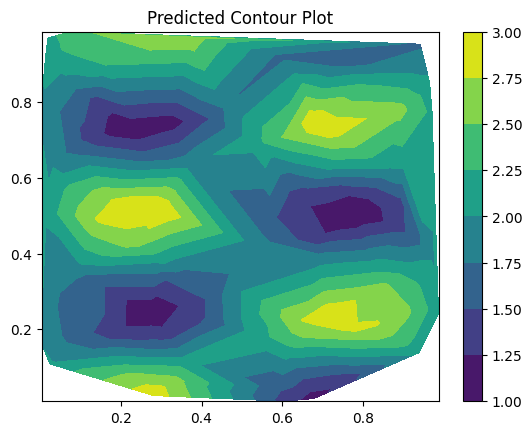

In [8]:
VisualizeData2D(X,pred,"Predicted Contour Plot")

In [9]:
print(f"loss on train data: {MSELoss(pred,y):.5f}")
print(f"loss on test data: {min_loss:.5f}")

loss on train data: 0.00163
loss on test data: 0.01923


**Convergence behaviour**

All looks good! 

Now we train our model for different input size i.e, 32,64,128 and 256

In [10]:
train_size = [32,64,128,256]
betas = [9,10,11,12,13,14,15,16,17,18,19,20,21,22]
nCentres = [8,16,24,32,40,48,56,64,72,80,88]
test_loss = []
for sz in train_size:
    X,y = GenerateData((sz,2),F)
    (min_loss,optimal_beta,optimal_nCentres) = GridSearch(betas,nCentres,X,y,X_test,y_test)
    model = RBFNN(nCentres=optimal_nCentres)
    model.reset_parameter(X,y,beta=optimal_beta)
    pred = model.forward(X)
    test_loss.append(min_loss)
    print(f"train size: {sz}")
    print(f"optimal beta: {optimal_beta}, optimal number of centre: {optimal_nCentres}")
    print(f"loss on train data: {MSELoss(pred,y):.5f}")
    print(f"loss on test data: {min_loss:.5f}")
    print("-----------------------------------------------")
    
    

train size: 32
optimal beta: 20, optimal number of centre: 32
loss on train data: 0.00000
loss on test data: 0.22060
-----------------------------------------------
train size: 64
optimal beta: 10, optimal number of centre: 56
loss on train data: 0.00178
loss on test data: 0.05808
-----------------------------------------------
train size: 128
optimal beta: 16, optimal number of centre: 80
loss on train data: 0.00136
loss on test data: 0.01894
-----------------------------------------------
train size: 256
optimal beta: 11, optimal number of centre: 80
loss on train data: 0.00214
loss on test data: 0.00588
-----------------------------------------------


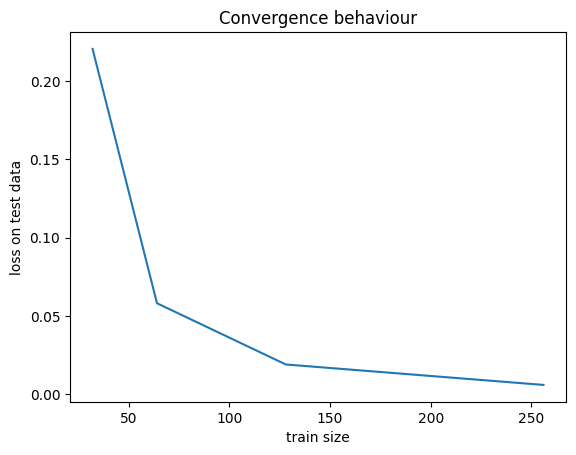

In [11]:
plt.plot(train_size,test_loss)
plt.title("Convergence behaviour")
plt.xlabel("train size")
plt.ylabel("loss on test data")
plt.show()